# PROJEKT EDA

Las, jako istotna część naszego ekosystemu, pełni nie tylko funkcję ekologiczną, lecz również spełnia kluczową rolę w utrzymaniu równowagi klimatycznej oraz dostarczaniu cennych zasobów. Jednakże, w obliczu coraz częstszych i bardziej intensywnych pożarów lasów, konieczne staje się zrozumienie oraz skuteczne zarządzanie tym zagrożeniem.

Informacje o zbiorze danych na których dokonałem analizy i wizualizacji:
    Dane pozyskałem ze strony dane.gov.pl. Obejumują one informację o zarejestrowanych pożarach lasów od 2018 do 2022 roku.
Linki do baz danych:
    https://dane.gov.pl/pl/dataset/2634/resource/36240/table?page=1&per_page=20&q=&sort=
    https://dane.gov.pl/pl/dataset/2990/resource/44796,291-rodzaj-pozarow-lasow-w-rozbiciu-na-wojewodztwo-powiat/table?page=1&per_page=20&q=&sort=
    https://dane.gov.pl/pl/dataset/1783/resource/21603,29_1_rodzaj-pozarow-lasow-w-rozbiciu-na-wojewodztwo-powiat/table
    https://dane.gov.pl/pl/dataset/1422/resource/15225,29_1-rodzaj-pozarow-lasow-w-rozbiciu-na-wojewodztwo-powiat/table
    https://dane.gov.pl/pl/dataset/1783/resource/21603,29_1_rodzaj-pozarow-lasow-w-rozbiciu-na-wojewodztwo-powiat/table

Podstawowe inforamcje:   
    W Polsce na przełomie lat 2018-2022 wybuchło ponad 35 000 pożarów leśnych, większość z nich bo, aż około 90% były to pożary pokrywy gleby, resztę pożarów zaliczamy do kategorii 'podpowierzchniowych', 'całkowity drzew' i 'pojedyńcze drzewo'.

Definicje pożarów:
- Podpowierzchniowy: Pożar rozwijający się pod ziemią, palący korzenie i materię organiczną pod powierzchnią gleby.

- Pokrywy gleby: Pożar, który obejmuje roślinność na powierzchni ziemi, taką jak suche liście, trawa i niższe gałęzie.

- Całkowity drzew: Intensywny pożar, który sięga koron drzew, paląc gałęzie i liście w koronie.

- Pojedyncze drzewo: Pożar ograniczony do jednego drzewa lub niewielkiej grupy drzew.

In [19]:
#Biblioteki do pobrania:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

O zbiorze danych:
    Na zbiór składa się pięć plików CSV, w każdym z nich znajdziemy informację o łącznej liczbie pożarach w Polsce, w danym województwie jak i powiecie w danym roku. Znajdziemy również informacje o tym ile wybuchło pożarów danego rodzaju.
    Nagłówki kolumn to odpowiednio:
    - LP. - numer indeksu liczony od 1,
    - OGÓŁEM - suma wszyskich rodzajów pożaru lasu dla danego miejsca,
    - Podpowierzchniowy - ilość pożarów o tym rodzaju,
    - Pokrywy gleby - ilość pożarów o tym rodzaju,
    - Całkowity drzew - ilość pożarów o tym rodzaju,
    - Pojedyncze drzewo - ilość pożarów o tym rodzaju

In [20]:
df = pd.read_csv("29_1_2018.csv", encoding='utf-8')
df.head()

,LP.,Podział administracyjny,OGÓŁEM,Podpowierzchniowy,Pokrywy gleby,Całkowity drzew,Pojedyncze drzewo
0,1,Polska,8801,384,7859,300,258
1,2,DOLNOŚLĄSKIE,714,82,549,32,51
2,3,bolesławiecki,37,3,29,3,2
3,4,dzierżoniowski,13,4,8,0,1
4,5,głogowski,13,1,10,2,0


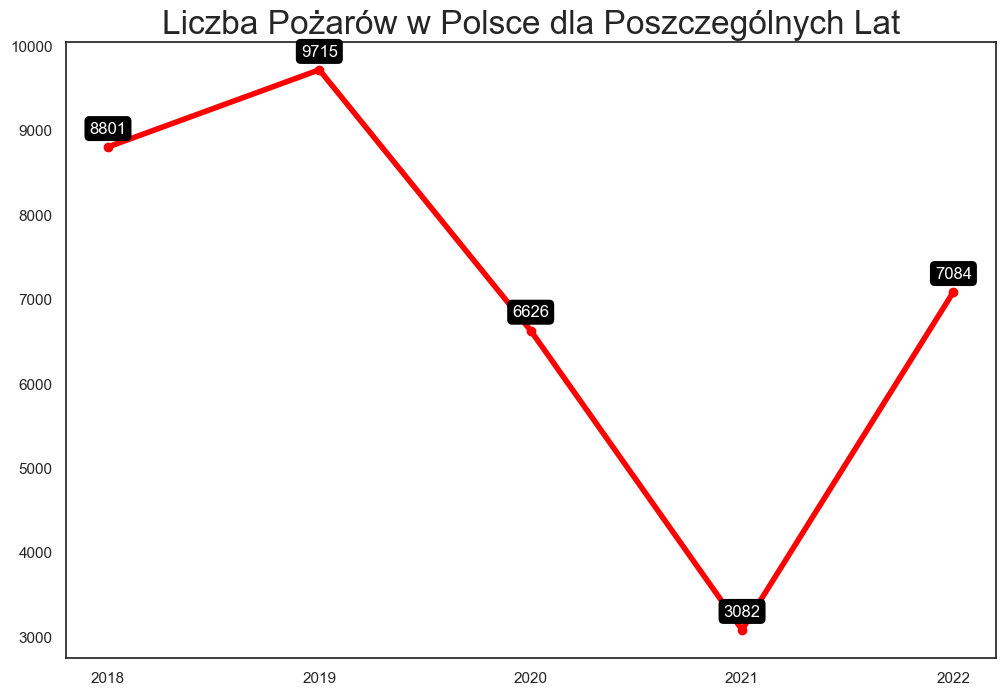

In [21]:
# Lista plików CSV
files = ["29_1_2018.csv", "29_1_2019.csv", "29_1_2020.csv", "29_1_2021.csv", "29_1_2022.csv"]

total_fires = []

for file in files:
    df = pd.read_csv(file, encoding='utf-8')

    country_name = df.at[1, "Podział administracyjny"]

    total_fires_value = df[df["OGÓŁEM"].notna()]["OGÓŁEM"].values[0]

    total_fires.append({"Rok": file[-8:-4], "Kraj": country_name, "OGÓŁEM": total_fires_value})

total_fires_df = pd.DataFrame(total_fires)

plt.figure(figsize=(12, 8))
sns.set_style("white")

plt.plot(total_fires_df["Rok"], total_fires_df["OGÓŁEM"], marker='o', color='red', label='Liczba Pożarów', linewidth=4)

plt.title('Liczba Pożarów w Polsce dla Poszczególnych Lat', fontsize=24)

for i, txt in enumerate(total_fires_df["OGÓŁEM"]):
    plt.annotate(txt, (total_fires_df["Rok"][i], total_fires_df["OGÓŁEM"][i]), textcoords="offset points", xytext=(0, 10), ha='center', color='white', fontsize=12, bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.3'))

plt.show()


Stanowczą większość pożarów leśnych wybucha na skutek działania człowieka, na wykresie możemy zauważyć znaczny spadek ilości wybuchów pożarów leśnych porównując rok 2021 z rokiem 2019, mogło być to spowodowane różnymi czynnikami takimi jak warunki atmosferyczne, lecz tutaj widocznym jest to jak covid-19 wpłynął na tę sytuację.

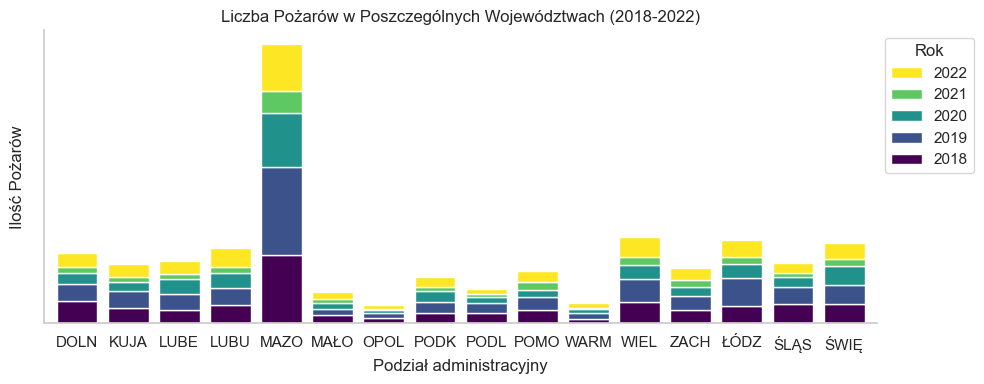

In [22]:
# Utwórz pustą ramkę danych do przechowywania danych z lat 2018-2022
merged_df = pd.DataFrame()

# Iteruj przez każdy plik CSV i łącz dane
for file in files:
    df = pd.read_csv(file, encoding='utf-8')
    wojewodztwa_df = df[df["Podział administracyjny"].str.isupper()]

    # Odczytaj rok z nazwy pliku
    rok = int(os.path.basename(file)[-8:-4])

    # Dodaj kolumnę z rokiem bez ostrzeżenia
    wojewodztwa_df = wojewodztwa_df.copy()
    wojewodztwa_df.loc[:, 'Rok'] = rok

    merged_df = pd.concat([merged_df, wojewodztwa_df], ignore_index=True)

# Przygotuj dane do wykresu stack bar
grouped_data = merged_df.groupby(["Podział administracyjny", "Rok"]).sum()["OGÓŁEM"].unstack()

# Ustawienia wykresu
sns.set_theme(style="whitegrid")

# Utwórz jeden obiekt figury i oś
fig, ax = plt.subplots(figsize=(10, 4))

# Tworzenie stack bar chart
grouped_data.plot(kind="bar", stacked=True, colormap="viridis", width=0.8, ax=ax)

# Ukrycie etykiet na słupkach
ax.set_yticklabels([])

# Zmiana nazw województw na trzy pierwsze litery
ax.set_xticklabels([label[:4] for label in grouped_data.index], rotation=0)

# Ustawienia osi i legendy
ax.set_title('Liczba Pożarów w Poszczególnych Województwach (2018-2022)')
ax.set_ylabel('Ilość Pożarów')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),title="Rok", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Pokazanie wykresu
plt.show()

Rzucającym się w oczy województwem jest Mazowieckie, obszar najbardziej zaludniony, gdzie nieuważni ludzie mają dużo okazji do beztroskiego korzystania z lasów, widać również, że najwięcej pożarów wybuchło w 2019 roku oraz tendencję spadkową tuż po.
Do najmniej zagrożonych pożarami możemy zaliczyć województwa Opolskie jakie i Warmińsko-mazurskie.

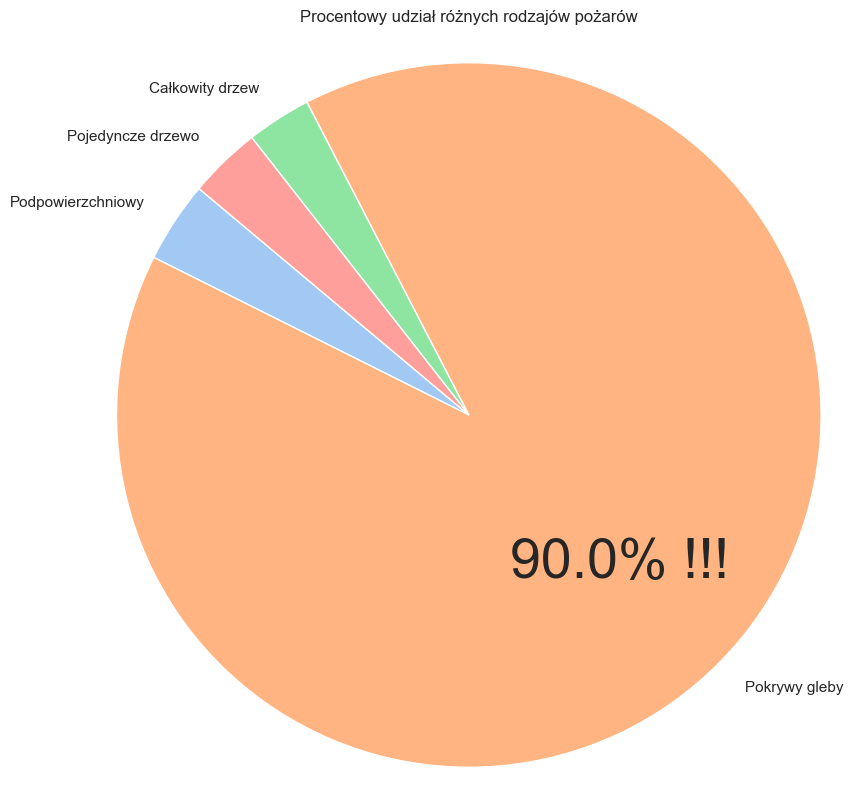

In [23]:
merged_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(file, encoding='utf-8')
    wojewodztwa_df = df[df["Podział administracyjny"].str.isupper()]

    rok = int(os.path.basename(file)[-8:-4])
    wojewodztwa_df = wojewodztwa_df.copy()
    wojewodztwa_df.loc[:, "Rok"] = rok

    merged_df = pd.concat([merged_df, wojewodztwa_df], ignore_index=True)


total_fires_by_type = merged_df[['Podpowierzchniowy', 'Pokrywy gleby', 'Całkowity drzew', 'Pojedyncze drzewo']].sum()
labels = total_fires_by_type.index
sizes = total_fires_by_type.values

plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")

patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='', startangle=140,
                                    colors=sns.color_palette('pastel'))
plt.title('Procentowy udział różnych rodzajów pożarów')

# Powiększenie czcionki dla "Pokrywy gleby"
for i, autotext in enumerate(autotexts):
    if labels[i] == 'Pokrywy gleby':
        autotext.set_text(f'{sizes[i] / sizes.sum() * 100:.1f}% !!!')
        autotext.set_fontsize(40)
    else:
        autotext.set_text('')  # Ukrycie procentów dla innych rodzajów pożarów

plt.axis('equal')
plt.show()


Pożary pokrywy gleb stanowią znaczącą ilość pożarów w Polsce, w każdym Województwie i w stanowczej większości Powiatów.
Są one nie odłącznym elementem każdego lata, suszy i sezonu turystycznego w polsce. Pożarów pokrywy gleby jest ponad 9 razy więcej niż łącznie wszystkich innych rodzajów pożarów lasów.

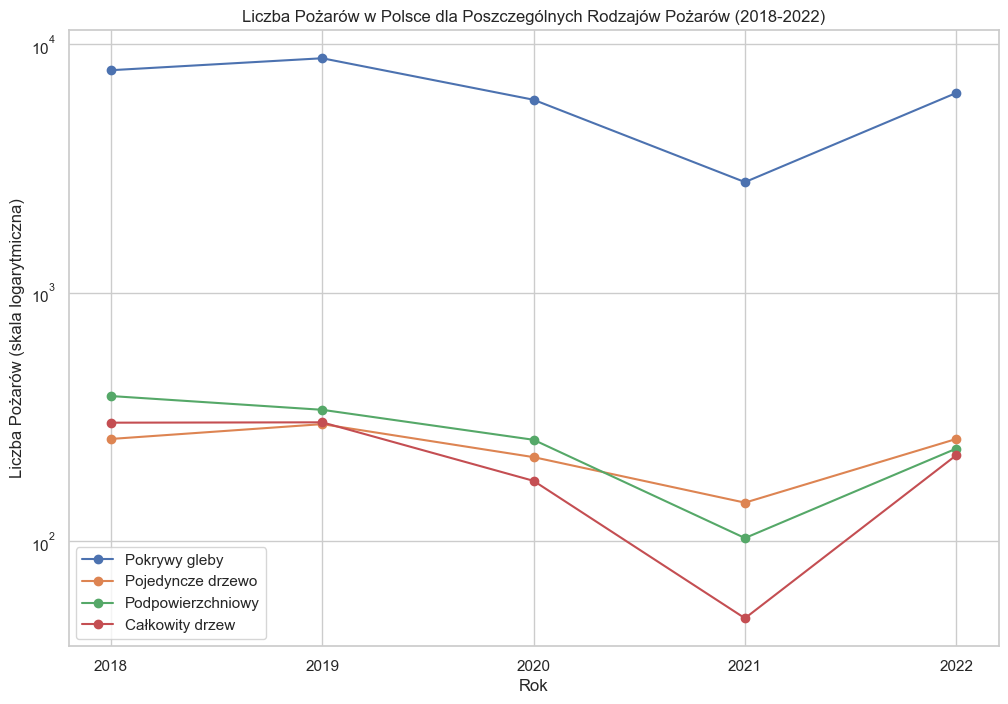

In [24]:
merged_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, encoding='utf-8')
    wojewodztwa_df = df[df["Podział administracyjny"].str.isupper()]

    rok = int(os.path.basename(file)[-8:-4])
    wojewodztwa_df = wojewodztwa_df.copy()
    wojewodztwa_df.loc[:, "Rok"] = rok

    merged_df = pd.concat([merged_df, wojewodztwa_df], ignore_index=True)

grouped_data = merged_df.groupby("Rok").sum()[['Podpowierzchniowy', 'Pokrywy gleby', 'Całkowity drzew', 'Pojedyncze drzewo']]

plt.figure(figsize=(12, 8))

# Ustawienie osi Y w notacji logarytmicznej
plt.yscale('log')

plt.plot(grouped_data.index, grouped_data['Pokrywy gleby'], label='Pokrywy gleby', marker='o')
plt.plot(grouped_data.index, grouped_data['Pojedyncze drzewo'], label='Pojedyncze drzewo', marker='o')
plt.plot(grouped_data.index, grouped_data['Podpowierzchniowy'], label='Podpowierzchniowy', marker='o')
plt.plot(grouped_data.index, grouped_data['Całkowity drzew'], label='Całkowity drzew', marker='o')


plt.title('Liczba Pożarów w Polsce dla Poszczególnych Rodzajów Pożarów (2018-2022)')
plt.xlabel('Rok')
plt.ylabel('Liczba Pożarów (skala logarytmiczna)')

plt.legend()
plt.xticks(grouped_data.index)

plt.show()

Ponownie widać, że pożary pokrywy gleby mają znaczną przewagę co do ilości względem innych rodzajów. Zastosować musiałem tutaj skalę logarytmiczną, inaczej przyćmione zostałyby inne rodzaje niż pokrywy gleby.

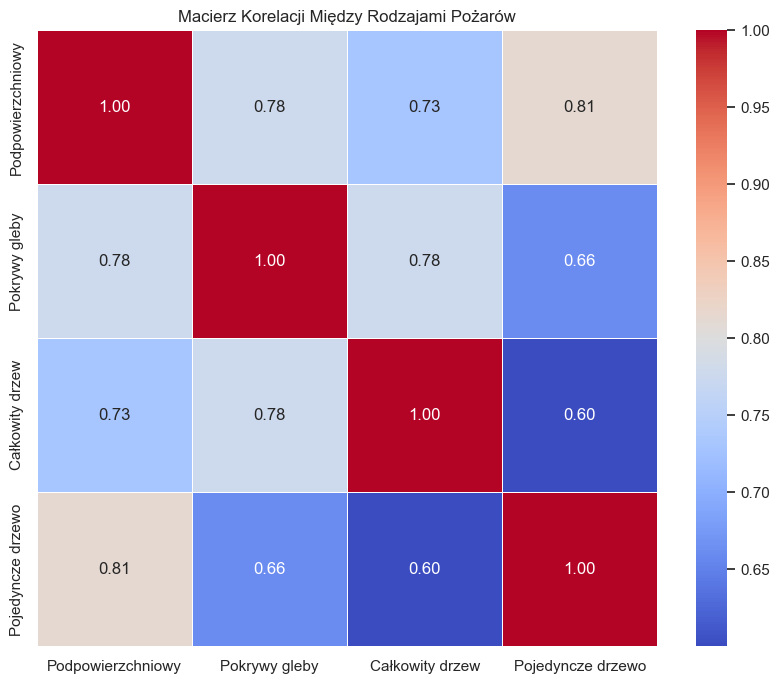

In [25]:
merged_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, encoding='utf-8')
    wojewodztwa_df = df[df["Podział administracyjny"].str.isupper()]

    rok = int(os.path.basename(file)[-8:-4])
    wojewodztwa_df = wojewodztwa_df.copy()
    wojewodztwa_df.loc[:, "Rok"] = rok

    merged_df = pd.concat([merged_df, wojewodztwa_df], ignore_index=True)

correlation_data = merged_df[['Podpowierzchniowy', 'Pokrywy gleby', 'Całkowity drzew', 'Pojedyncze drzewo']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Macierz Korelacji Między Rodzajami Pożarów')

plt.show()


Ciężko mówić tu o braku jakichkolwiek korelacji, ponieważ wszystkie wartości są większe lub równe 0.60, są to pożary, więc nie mogło być inaczej. Wyróżnia się relacja pożaru podpowierzchniowego z pożarem pojedyńczego drzewa, co jest logiczne, gdy mamy sytuacje, że płomień przemieszcza się korzeniami i przechodzi na kolejne drzewo, które nie musi się łączyć korzeniami z drzewem następnym.

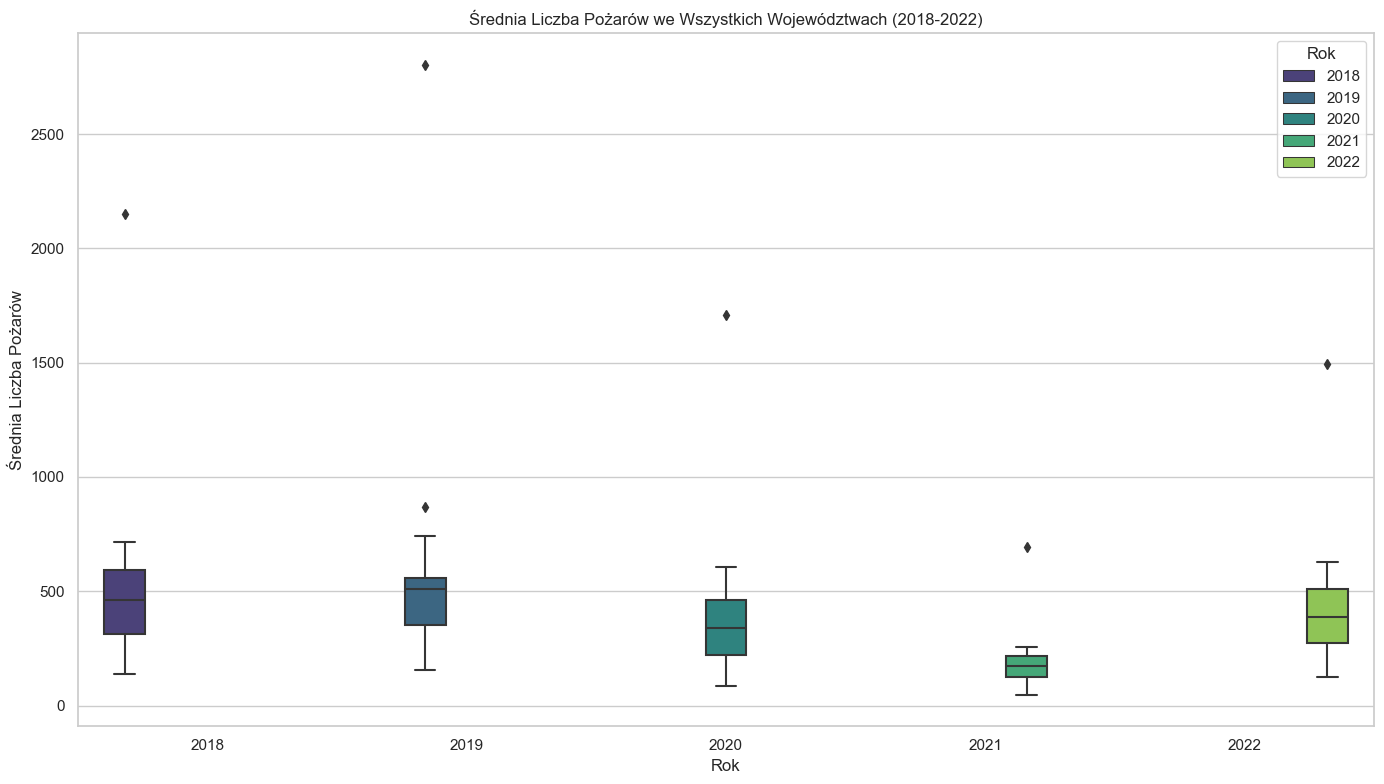

In [26]:
merged_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, encoding='utf-8')

    rok = int(os.path.basename(file)[-8:-4])
    df["Rok"] = rok

    merged_df = pd.concat([merged_df, df], ignore_index=True)

grouped_data = merged_df[merged_df["Podział administracyjny"].str.isupper()].groupby(["Rok", "Podział administracyjny"]).mean()["OGÓŁEM"]

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

sns.boxplot(x="Rok", y="OGÓŁEM", hue="Rok", data=grouped_data.reset_index(), palette="viridis")

plt.title('Średnia Liczba Pożarów we Wszystkich Województwach (2018-2022)')
plt.ylabel('Średnia Liczba Pożarów')
plt.tight_layout()
plt.show()


Wartości bardzo odbiegające do średniej dla każdego roku pochodzą z województwa Mazowieckiego, jak już wspomniałem turystyka, wysokie zaludnienie oraz susze wspomagają tamtejszym pożarom. Wartość minimalna w każdym roku jest bardzo podobna, są to województwa takie jak Opole czy Warmińsko-mazurskie. 

Wnioski:
Las pełni kluczową rolę w utrzymaniu równowagi ekosystemu i klimatu.
W obliczu wzrastającej liczby pożarów lasów konieczne jest zrozumienie i skuteczne zarządzanie tym zagrożeniem.
Na przestrzeni lat 2018-2022 w Polsce wybuchło ponad 35 000 pożarów leśnych. Około 90% pożarów to pożary pokrywy gleby.
Większość pożarów leśnych wybucha na skutek działań człowieka. Obserwuje się spadek liczby pożarów w 2021 roku w porównaniu do 2019 roku, co może być związane z różnymi czynnikami, takimi jak warunki atmosferyczne i wpływ pandemii COVID-19.
Województwo Mazowieckie, ze względu na duże zaludnienie i turystykę, jest szczególnie narażone na pożary leśne.
Pożary pokrywy gleby stanowią znaczącą większość wszystkich pożarów leśnych w Polsce. Są one szczególnie powszechne w okresie suszy i sezonu turystycznego.
Wartości współczynnika korelacji między rodzajami pożarów są znaczne, co wskazuje na ogólną zależność między nimi.
Wyróżnia relacja między pożarami podpowierzchniowymi a pożarami pojedynczego drzewa, co ma sens ze względu na przemieszczanie się ognia korzeniami.
Analiza ta może być podstawą do dalszych badań i opracowania skutecznych strategii zarządzania pożarami leśnymi w Polsce, zwłaszcza w obszarach szczególnie narażonych.